# Derivation of non-centered D3DX3 scheme without using ghost points

The non-centre version is used when the processors is at the outer x boundary. The following scheme is 6th order convergent.

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, together, as_finite_diff, simplify
from sympy import Function, Eq, S

init_printing()

In [2]:
x = symbols('x')
h = symbols('h', positive=True)

f = Function('f')

# Stencils
stencil = [x-7*h, x-6*h, x-5*h, x-4*h ,x-3*h, x-2*h, x-h, x, x+h/2]

We are here discretizing the equation

$$ \partial_\rho^3 f$$

### Calculate the finite difference approximation of $\partial_x^3 f$

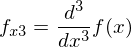

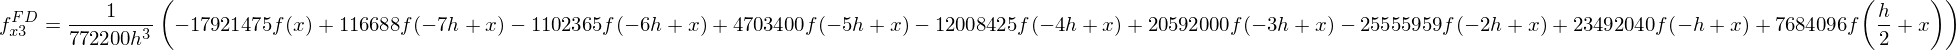

(-17921475*f(x) + 116688*f(-7*h + x) - 1102365*f(-6*h + x) + 4703400*f(-5*h + x) - 12008425*f(-4*h + x) + 20592000*f(-3*h + x) - 25555959*f(-2*h + x) + 23492040*f(-h + x) + 7684096*f(h/2 + x))/(772200*h**3)


In [15]:
fx3 = f(x).diff(x,3)
fx3FD = as_finite_diff(fx3, stencil)
display(Eq(symbols('f_x3'), fx3))
display(Eq(symbols('f^FD_x3'), together(fx3FD)))
print(together(fx3FD))

# Calculating the order

Let's call the Taylor expansions of $f$ for $T[f(x,a)] = \sum_{n=0}^\infty\frac{f^{(n)}(a)}{n!}(x-a)^n$

In [4]:
x0 = symbols('x0')
terms = 11

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x$, so that $T[f(x,a \to x_0)]$

In [5]:
F = f(x).series(x, x0=x0, n=terms)
F = F.subs(x-x0,0)
display(Eq(symbols('F'),F))

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x+\frac{h}{2}$, so that $T\left[f\left(x \to x+\frac{h}{2}, a \to x_0\right)\right]$

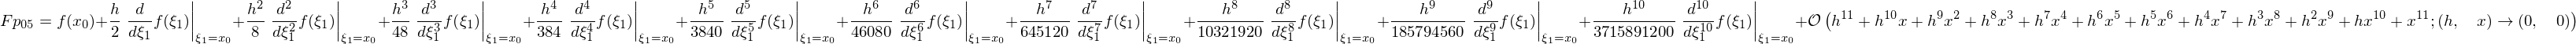

In [6]:
Fp05 = f(x+h/2).series(x+h/2, x0=x0, n=terms)
Fp05 = Fp05.subs(x-x0,0)
display(Eq(symbols('Fp05'),Fp05))

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x-h$, so that $T[f(x \to x-h, a \to x_0)]$

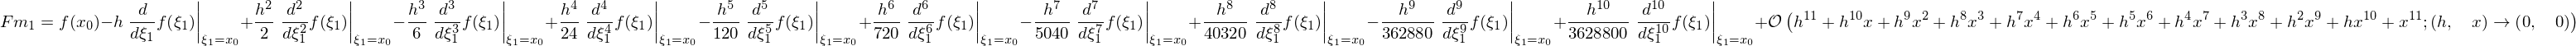

In [7]:
Fm1 = f(x-h).series(x-h, x0=x0, n=terms)
Fm1 = Fm1.subs(x-x0,0)
display(Eq(symbols('Fm1'),Fm1))

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x-2h$, so that $T[f(x \to x-2h, a \to x_0)]$

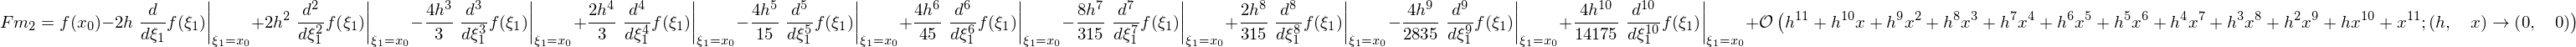

In [8]:
Fm2 = f(x-2*h).series(x-2*h, x0=x0, n=terms)
Fm2 = Fm2.subs(x-x0,0)
display(Eq(symbols('Fm2'),Fm2))

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x-3h$, so that $T[f(x \to x-3h, a \to x_0)]$

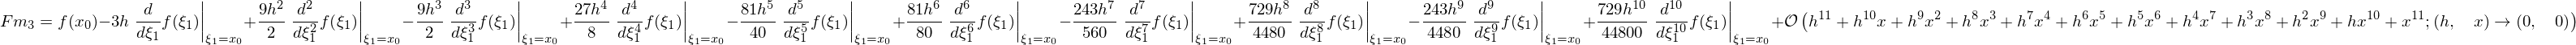

In [9]:
Fm3 = f(x-3*h).series(x-3*h, x0=x0, n=terms)
Fm3 = Fm3.subs(x-x0,0)
display(Eq(symbols('Fm3'),Fm3))

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x-4h$, so that $T[f(x \to x-4h, a \to x_0)]$

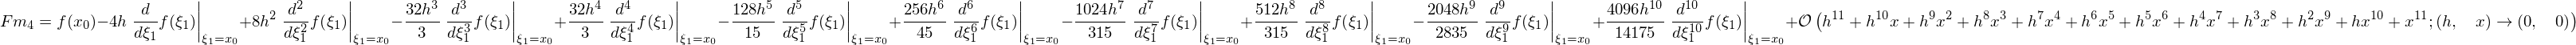

In [10]:
Fm4 = f(x-4*h).series(x-4*h, x0=x0, n=terms)
Fm4 = Fm4.subs(x-x0,0)
display(Eq(symbols('Fm4'),Fm4))

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x-5h$, so that $T[f(x \to x-5h, a \to x_0)]$

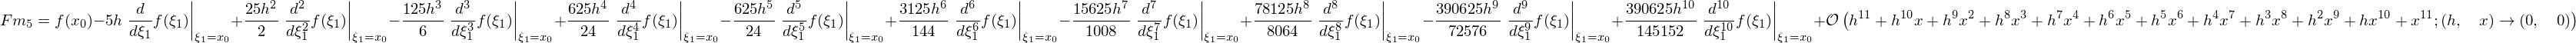

In [11]:
Fm5 = f(x-5*h).series(x-5*h, x0=x0, n=terms)
Fm5 = Fm5.subs(x-x0,0)
display(Eq(symbols('Fm5'),Fm5))

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x-6h$, so that $T[f(x \to x-6h, a \to x_0)]$

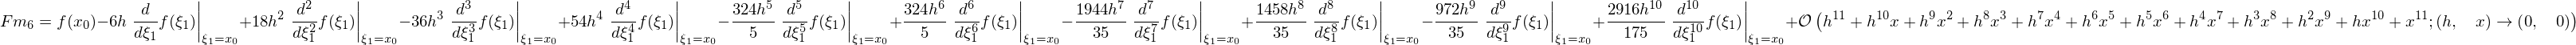

In [12]:
Fm6 = f(x-6*h).series(x-6*h, x0=x0, n=terms)
Fm6 = Fm6.subs(x-x0,0)
display(Eq(symbols('Fm6'),Fm6))

Taylor expasion of $f$ evaluated in $x_0$ expanded around $x-7h$, so that $T[f(x \to x-7h, a \to x_0)]$

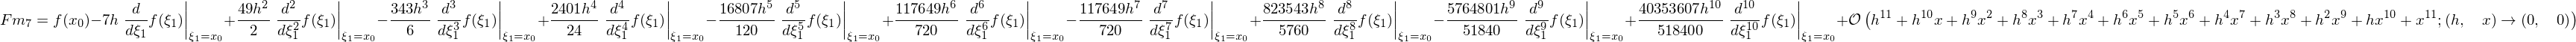

In [13]:
Fm7 = f(x-7*h).series(x-7*h, x0=x0, n=terms)
Fm7 = Fm7.subs(x-x0,0)
display(Eq(symbols('Fm7'),Fm7))

Substitute into the FD scheme

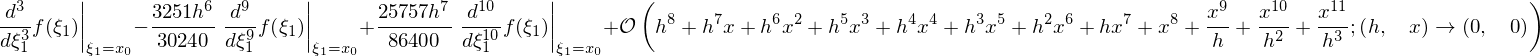

In [14]:
fx3FDT = fx3FD.subs([(f(x+h/2), Fp05),
                     (f(x)    , F   ),
                     (f(x-h)  , Fm1 ),
                     (f(x-2*h), Fm2 ),
                     (f(x-3*h), Fm3 ),
                     (f(x-4*h), Fm4 ),                     
                     (f(x-5*h), Fm5 ),
                     (f(x-6*h), Fm6 ),
                     (f(x-7*h), Fm7 ),
                    ])
display(simplify(fx3FDT))

Thus, we see that this discretization is 6th order accurate.